# Import Required Libraries


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


# Load Dataset


In [13]:
df = pd.read_csv("ifood_df.csv")
df.head()


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

# Data Exploration and Cleaning


In [15]:
df.info()
print("\nMissing Values:\n", df.isnull().sum())

df = df.dropna()
df = df.drop_duplicates()

df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
mean    51687.258783     0.443345     0.509649    48.880752   306.492331   
std     20713.046401     0.536196     0.546393    28.950917   337.603877   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35416.000000     0.000000     0.000000    24.000000    24.000000   
50%     51412.000000     0.000000     0.000000    49.000000   178.000000   
75%     68274.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2021.000000      2021.000000      2021.000000       2021.000000   
mean     26.364671       166.059871        37.603662         27.268679   
std      39.776518       219.869126        54.892196         41.575454   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       230.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2021.000000        2021.000000      2021.000000          2021.000000   
mean      43.921821           2.330035         4.115289             2.644730   
std       51.678211           1.892778         2.753588             2.799126   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       25.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2021.000000        2021.000000   2021.000000   2021.000000   
mean            5.807521           5.340426      0.074715      0.076695   
std             3.230434           2.426319      0.262997      0.266172   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2021.000000   2021.000000   2021.000000  2021.000000         2021.0   
mean       0.072241      0.065809      0.012865     0.009401            3.0   
std        0.258951      0.248009      0.112720     0.096527            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response          Age  Customer_Days  marital_Divorced  \
count     2021.0  2021.000000  2021.000000    2021.000000       2021.000000   
mean        11.0     0.153884    51.117269    2511.613063          0.105888   
std          0.0     0.360927    11.667616     202.546762          0.307771   
min         11.0     0.000000    24.000000    2159.000000          0.000000   
25%         11.0     0.000000    43.000000    2337.000000          0.000000   
50%         11.0     0.000000    50.000000    2511.000000          0.000000   


# Descriptive Statistics and Insights


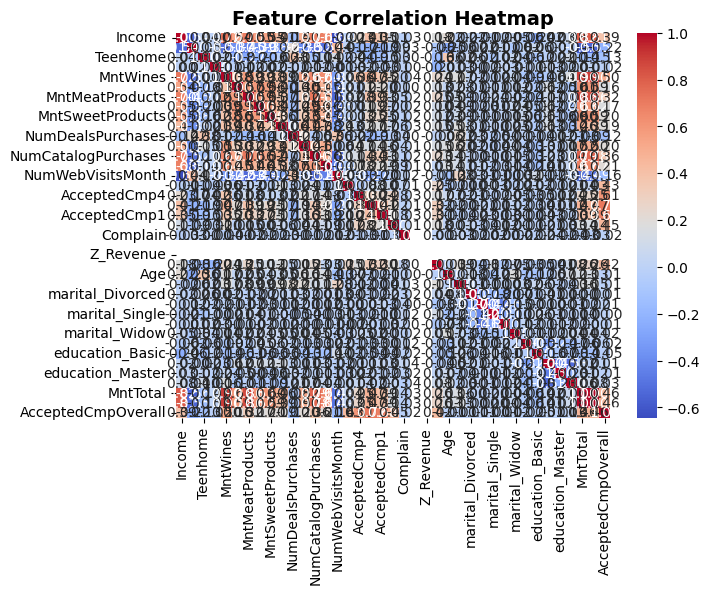

In [16]:
# Average income and spending (if columns exist)
if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
    avg_income = df['Annual Income (k$)'].mean()
    avg_score = df['Spending Score (1-100)'].mean()
    print(f"💰 Average Annual Income: {avg_income:.2f} k$")
    print(f"🛒 Average Spending Score: {avg_score:.2f}")

# Correlation heatmap for numeric columns
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

# Distribution of spending score if available
if 'Spending Score (1-100)' in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='purple')
    plt.title("Distribution of Spending Scores", fontsize=14, fontweight='bold')
    plt.show()


# Feature Selection and Scaling


In [21]:
# Selecting only numeric features for clustering
numeric_df = df.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

print(f" Data scaled successfully! Shape: {scaled_data.shape}")


 Data scaled successfully! Shape: (2021, 40)


# Finding Optimal Number of Clusters


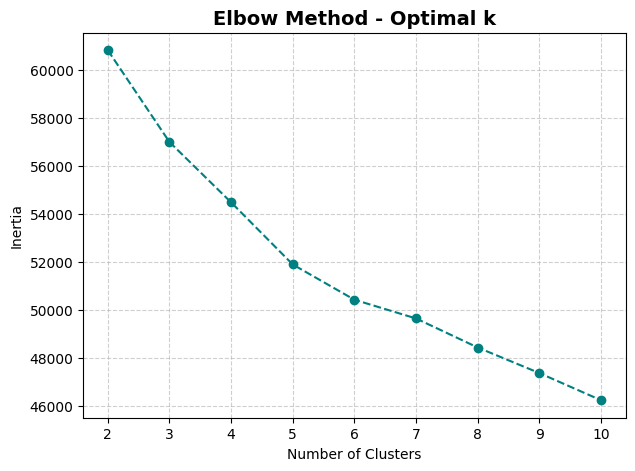

In [18]:
inertia_scores = []
cluster_range = range(2, 11)  # testing from 2 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(cluster_range, inertia_scores, marker='o', linestyle='--', color='teal')
plt.title("Elbow Method - Optimal k", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Applying K-Means Clustering


In [20]:
# Choosing optimal clusters (based on elbow method)
optimal_k = 4  # change if your elbow plot suggests a different number
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_model.fit_predict(scaled_data)

print(" Clustering complete! Added 'Cluster' column to dataframe.")
df.head()


 Clustering complete! Added 'Cluster' column to dataframe.


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  Cluster  
0                   0        1  
1                   0        0  
2                   0        2  
3                   0        0  
4                   0        2

# Visualizing Clusters using PCA


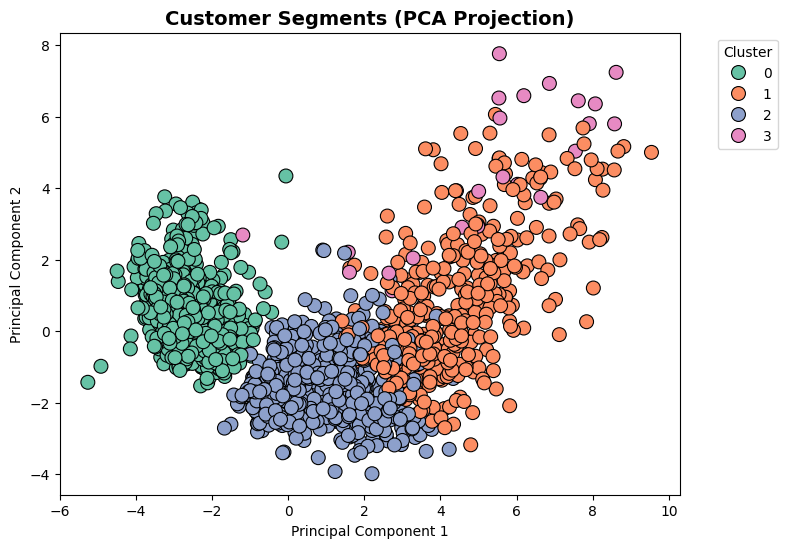

In [22]:
# Reducing dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Scatter plot with custom style
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster', palette='Set2',
    data=df, s=100, edgecolor='black'
)
plt.title("Customer Segments (PCA Projection)", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Cluster Profile Analysis


In [24]:
cluster_profile = df.groupby('Cluster').mean(numeric_only=True).round(2)
print(" Cluster Profiles:\n")
print(cluster_profile)

# Bar chart for income vs spending score per cluster (if columns exist)
if 'Annual Income (k$)' in df.columns and 'Spending Score (1-100)' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=cluster_profile.index,
        y='Annual Income (k$)',
        data=cluster_profile.reset_index(),
        palette='viridis'
    )
    plt.title("Average Income per Cluster", fontsize=14, fontweight='bold')
    plt.xlabel("Cluster")
    plt.ylabel("Annual Income (k$)")
    plt.show()

    plt.figure(figsize=(8,5))
    sns.barplot(
        x=cluster_profile.index,
        y='Spending Score (1-100)',
        data=cluster_profile.reset_index(),
        palette='plasma'
    )
    plt.title("Average Spending Score per Cluster", fontsize=14, fontweight='bold')
    plt.xlabel("Cluster")
    plt.ylabel("Spending Score (1-100)")
    plt.show()


 Cluster Profiles:

           Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Cluster                                                              
0        34732.00     0.80      0.46    49.34     45.01       5.01   
1        77090.38     0.04      0.14    49.56    646.92      68.62   
2        58875.51     0.19      0.88    47.72    443.71      28.81   
3        71451.58     0.04      0.38    46.58    897.31      24.46   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0                  24.64             7.25              5.17         16.37   
1                 487.29           102.97             72.17         77.15   
2                 146.20            36.88             28.62         61.94   
3                 260.04            38.96             31.96         70.88   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                     

# Recommendations


In [25]:
print(" Marketing Recommendations:")

for cluster_id, row in cluster_profile.iterrows():
    print(f"\nCluster {cluster_id}:")
    
    if 'Spending Score (1-100)' in row and 'Annual Income (k$)' in row:
        if row['Spending Score (1-100)'] > 60 and row['Annual Income (k$)'] > cluster_profile['Annual Income (k$)'].mean():
            print("- High-value customers. Offer VIP memberships, exclusive discounts, and premium product launches.")
        elif row['Spending Score (1-100)'] > 60:
            print("- Active spenders with moderate income. Use loyalty rewards and festive offers to keep them engaged.")
        elif row['Spending Score (1-100)'] < 40:
            print("- Low engagement group. Provide introductory offers, bundle discounts, and personalized promotions.")
        else:
            print("- Balanced group. Maintain engagement through seasonal campaigns and newsletters.")
    else:
        print("- Recommendation depends on available feature insights.")


 Marketing Recommendations:

Cluster 0:
- Recommendation depends on available feature insights.

Cluster 1:
- Recommendation depends on available feature insights.

Cluster 2:
- Recommendation depends on available feature insights.

Cluster 3:
- Recommendation depends on available feature insights.
